In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# load the dataset
df = pd.read_csv('C:/Users/javeria/Downloads/Data Analyst Projects/Video game sales/Video_Games_Sales.csv')

In [9]:
print(df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [19]:
# convert Critic_Score and User_Score to numeric --> errors to NaN
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
print(df[['Critic_Score', 'User_Score']].isnull().sum())
df.fillna({'Critic_Score': df['Critic_Score'].mean(), 'User_Score': df['User_Score'].mean()}, inplace=True)

Critic_Score    8582
User_Score      9129
dtype: int64


In [21]:
# Question 1: Which genres of video games have the highest global sales, and how does this relate to their critic and user scores?
genre_sales = df.groupby('Genre').agg({
    'Global_Sales': 'sum',
    'Critic_Score': 'mean',
    'User_Score': 'mean'
}).reset_index().sort_values(by='Global_Sales', ascending=False)
print(genre_sales)

           Genre  Global_Sales  Critic_Score  User_Score
0         Action       1745.27     67.656132    7.086490
10        Sports       1332.00     70.493484    7.048076
8        Shooter       1052.94     69.833522    7.066964
7   Role-Playing        934.40     70.778226    7.369973
4       Platform        828.08     68.458741    7.210046
3           Misc        803.18     68.265909    7.048363
6         Racing        728.90     68.371187    7.079446
2       Fighting        447.48     69.088078    7.208446
9     Simulation        390.42     68.827378    7.128804
5         Puzzle        243.02     68.371541    7.136070
1      Adventure        237.69     68.066251    7.126877
11      Strategy        174.50     70.346538    7.202514


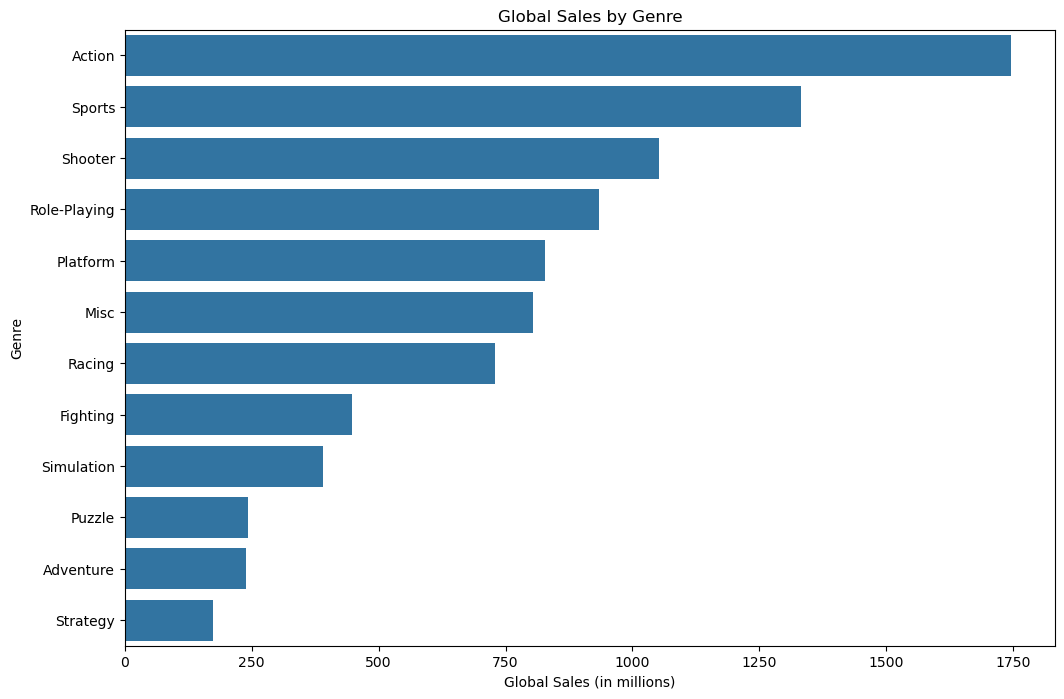

In [23]:
# visualize global sales by genre
plt.figure(figsize=(12, 8))
sns.barplot(x='Global_Sales', y='Genre', data=genre_sales)
plt.title('Global Sales by Genre')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre')
plt.show()

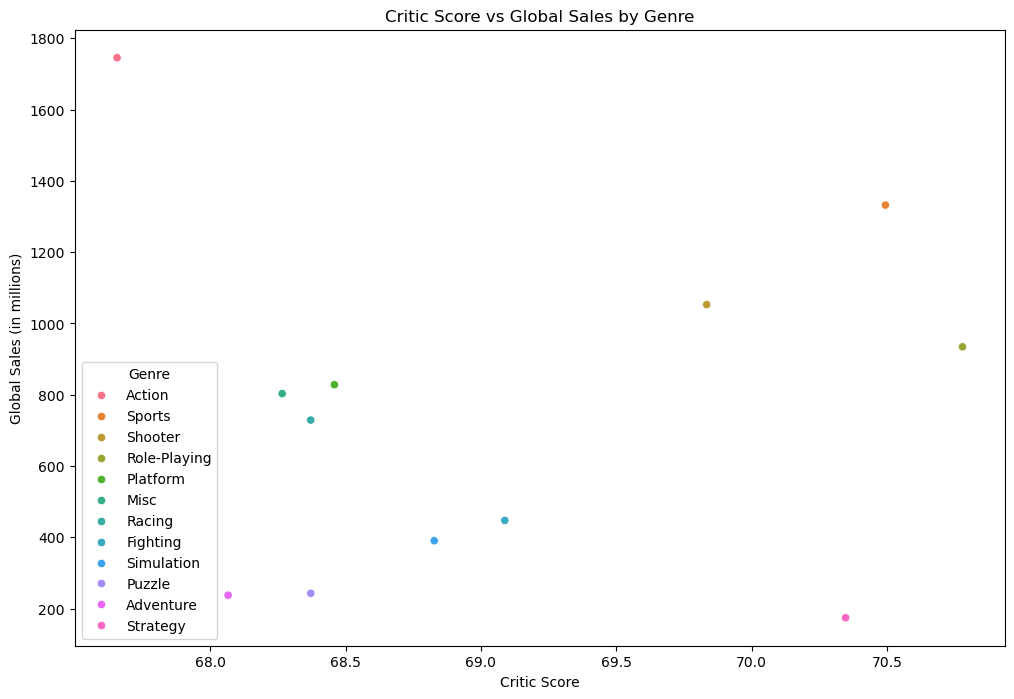

In [25]:
# scatter plot of critic score and global sales by genre
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Critic_Score', y='Global_Sales', hue='Genre', data=genre_sales)
plt.title('Critic Score vs Global Sales by Genre')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Genre')
plt.show()

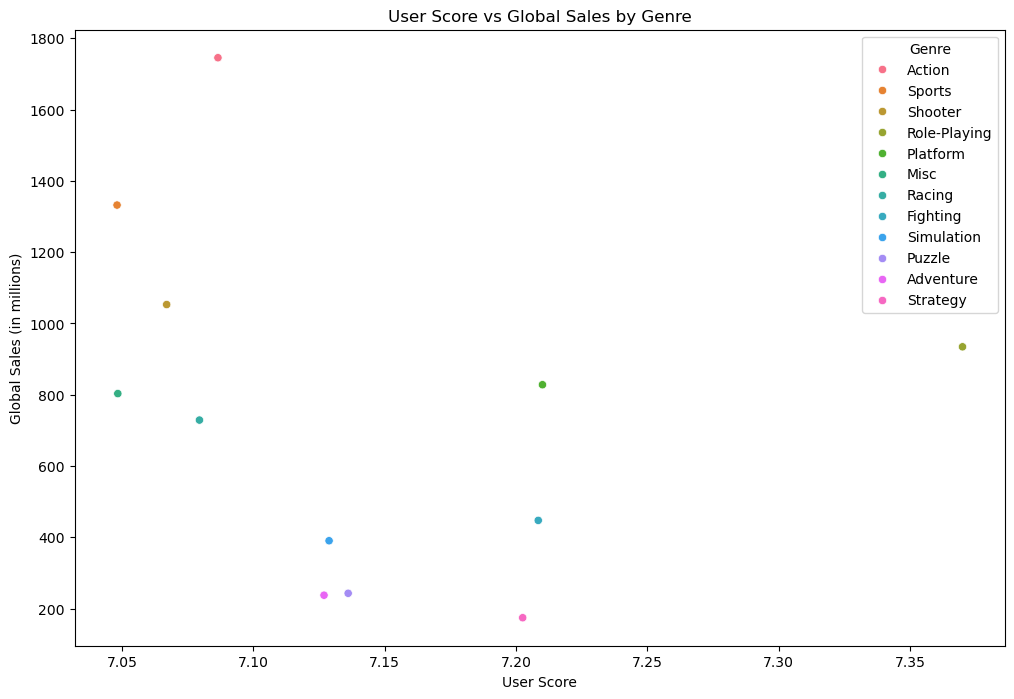

In [27]:
# scatter plot of user score and global sales by genre
plt.figure(figsize=(12, 8))
sns.scatterplot(x='User_Score', y='Global_Sales', hue='Genre', data=genre_sales)
plt.title('User Score vs Global Sales by Genre')
plt.xlabel('User Score')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Genre')
plt.show()

In [29]:
# Question 2: How do sales and ratings vary across different platforms?

platform_sales = df.groupby('Platform').agg({
    'Global_Sales': 'sum',
    'Critic_Score': 'mean',
    'User_Score': 'mean'
}).reset_index().sort_values(by='Global_Sales', ascending=False)


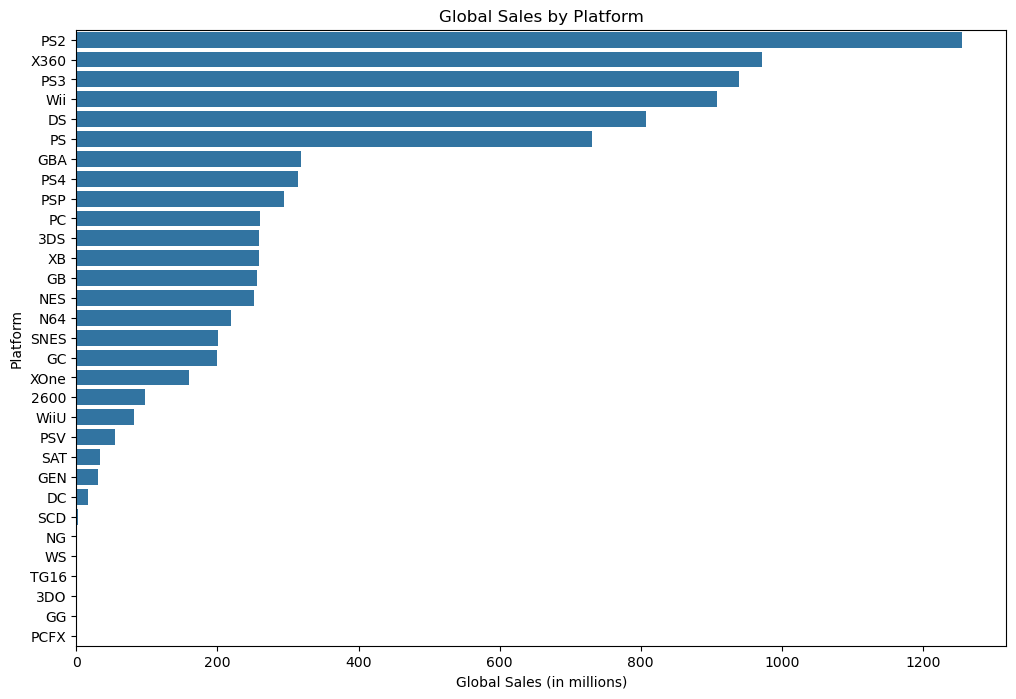

In [31]:
# global sales by platform
plt.figure(figsize=(12, 8))
sns.barplot(x='Global_Sales', y='Platform', data=platform_sales)
plt.title('Global Sales by Platform')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Platform')
plt.show()

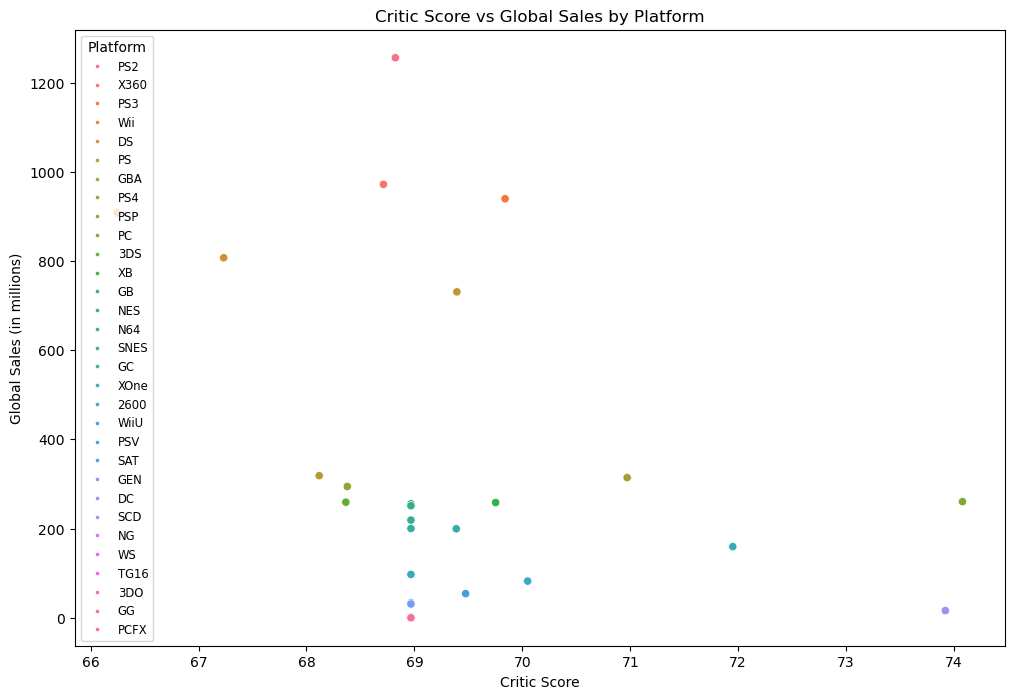

In [35]:
# scatter plot of critic score vs global sales by platform
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Critic_Score', y='Global_Sales', hue='Platform', data=platform_sales)
plt.title('Critic Score vs Global Sales by Platform')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Platform', fontsize='small', markerscale=0.5) #legend smol
plt.show()


In [37]:
# Question 3: What is the trend of global sales over the years, and how do critic and user scores influence this trend?
yearly_sales = df.groupby('Year_of_Release').agg({
    'Global_Sales': 'sum',
    'Critic_Score': 'mean',
    'User_Score': 'mean'
}).reset_index()

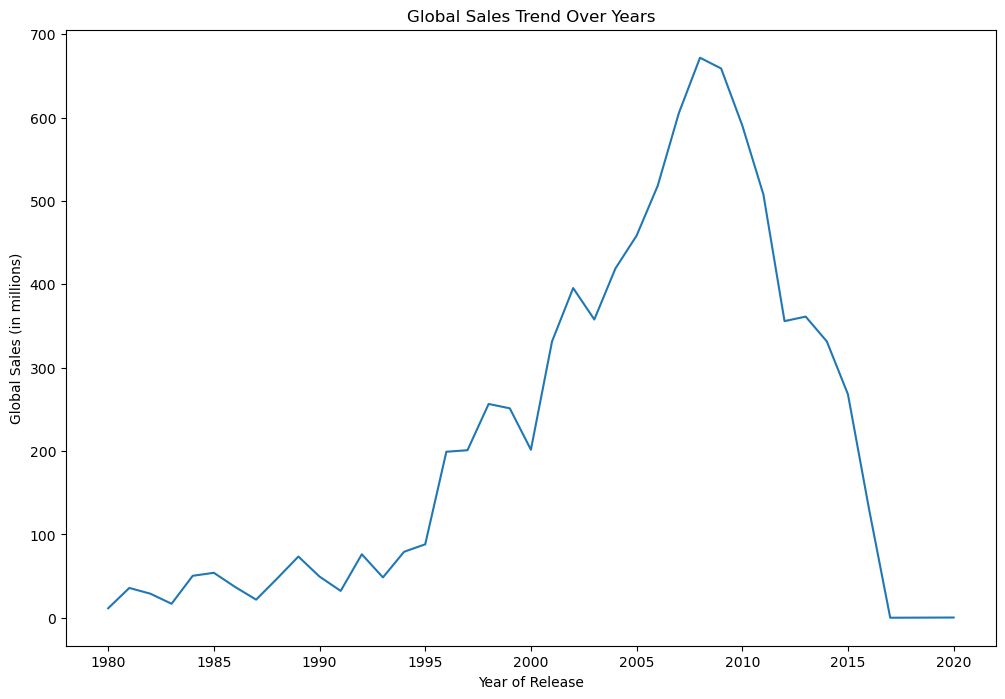

In [39]:
# line plot of global sales over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year_of_Release', y='Global_Sales', data=yearly_sales)
plt.title('Global Sales Trend Over Years')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (in millions)')
plt.show()

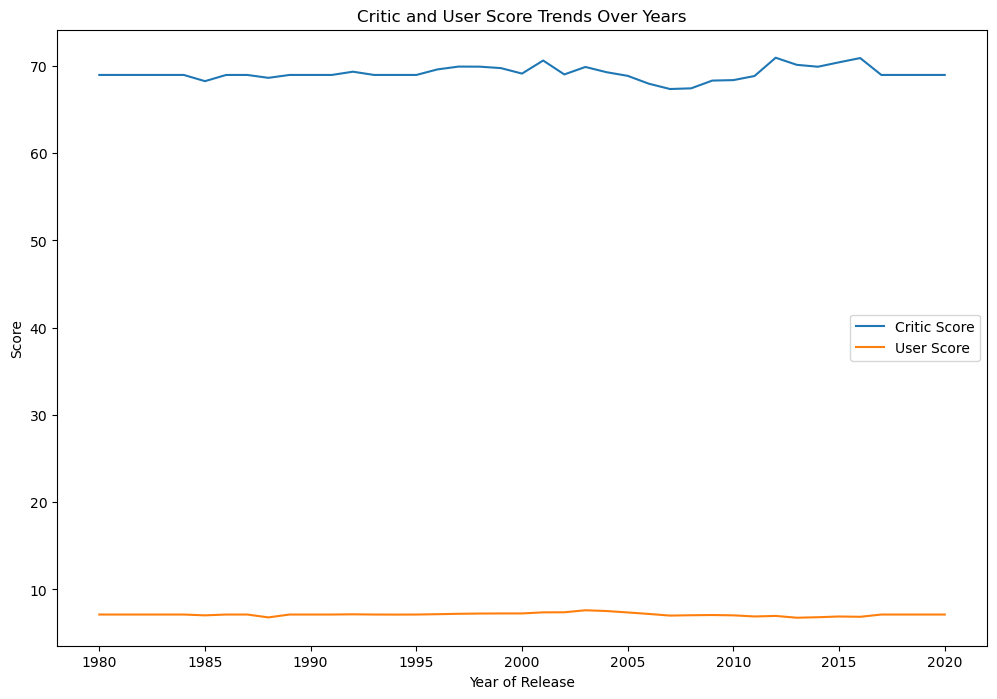

In [41]:
# line plot of critic and user score trends over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year_of_Release', y='Critic_Score', data=yearly_sales, label='Critic Score')
sns.lineplot(x='Year_of_Release', y='User_Score', data=yearly_sales, label='User Score')
plt.title('Critic and User Score Trends Over Years')
plt.xlabel('Year of Release')
plt.ylabel('Score')
plt.legend()
plt.show()

In [51]:
# Question 4: Which publishers have the highest global sales and what are their average critic and user scores?

# aggregate global sales by publisher
publisher_sales = df.groupby('Publisher').agg({
    'Global_Sales': 'sum'
}).reset_index()
# select the top 15 after sorting
top_publishers = publisher_sales.sort_values(by='Global_Sales', ascending=False).head(15)


C:\Users\javeria\AppData\Local\Temp\ipykernel_19440\3783667132.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Publisher', data=top_publishers, palette='viridis')


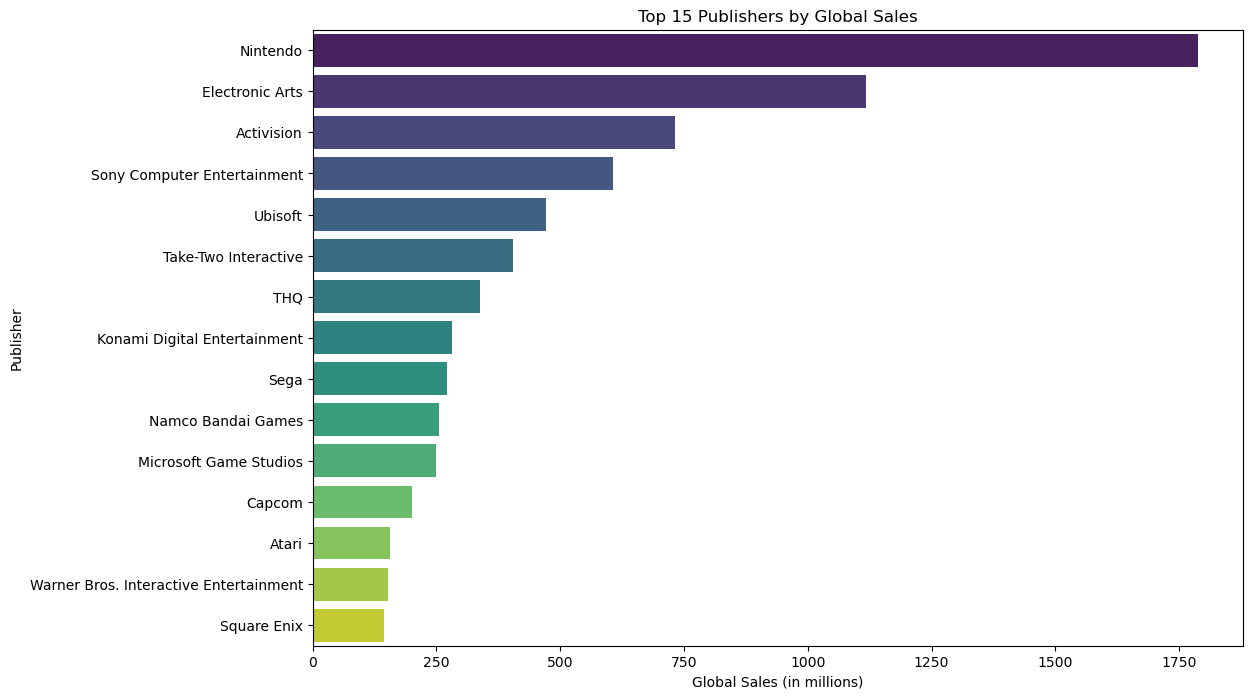

In [53]:
# top 15 publishers
plt.figure(figsize=(12, 8))
sns.barplot(x='Global_Sales', y='Publisher', data=top_publishers, palette='viridis')
plt.title('Top 15 Publishers by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Publisher')
plt.show()

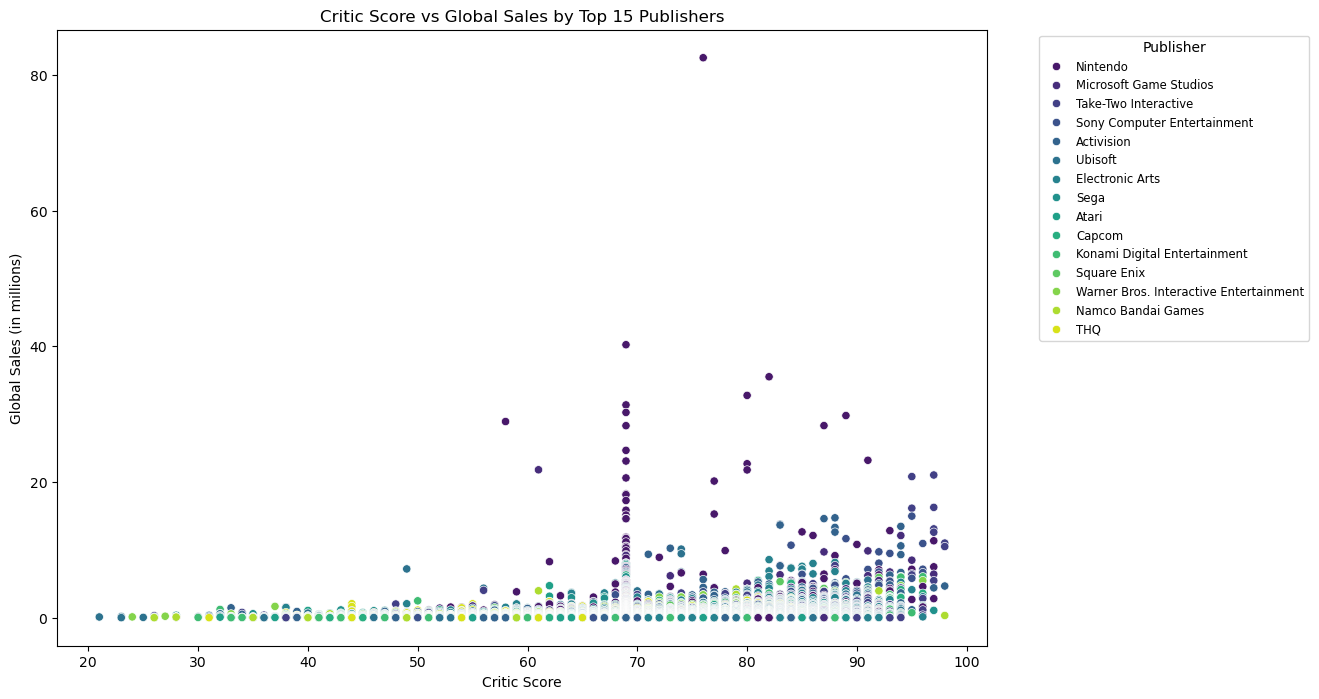

In [61]:
# only the top 15 publishers - too many otw
top_publishers_data = df[df['Publisher'].isin(top_publishers['Publisher'])]

# scatter plot of critic score vs global sales by publisher
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Critic_Score', y='Global_Sales', hue='Publisher', data=top_publishers_data, palette='viridis', legend='full')
plt.title('Critic Score vs Global Sales by Top 15 Publishers')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # adjust legend
plt.show()


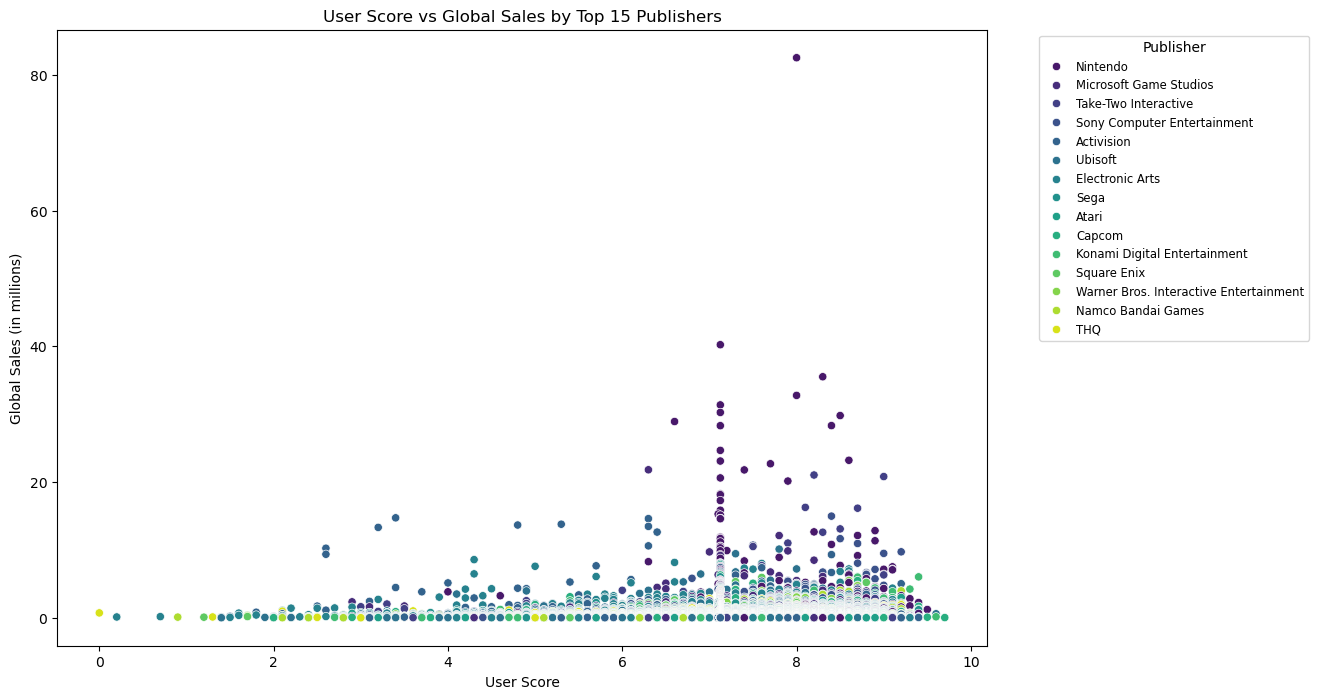

In [64]:
# scatter plot of user Score vs global sales by publisher
plt.figure(figsize=(12, 8))
sns.scatterplot(x='User_Score', y='Global_Sales', hue='Publisher', data=top_publishers_data, palette='viridis', legend='full')
plt.title('User Score vs Global Sales by Top 15 Publishers')
plt.xlabel('User Score')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # adjust legend
plt.show()


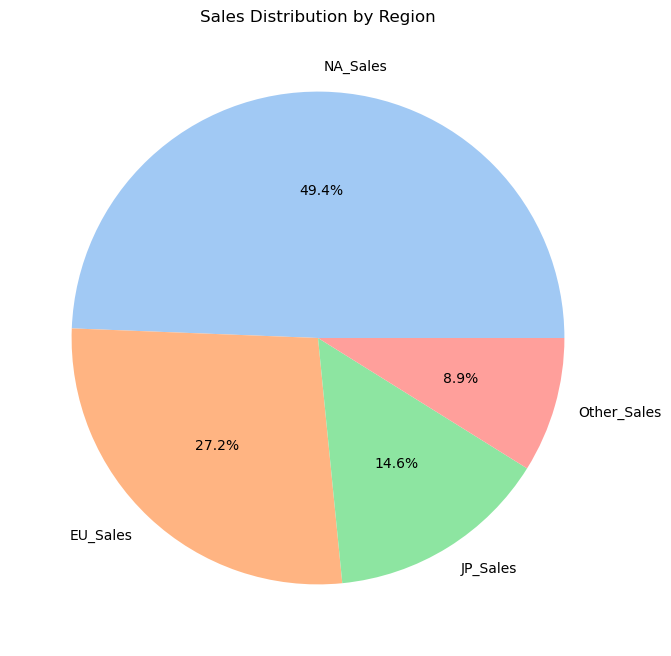

In [72]:
# Question 5: How do sales and ratings differ across regions (NA, EU, JP, Other), and what might explain these differences?

# Sum sales by region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
region_sales.columns = ['Region', 'Global_Sales']

# pie chart for sales by region
plt.figure(figsize=(10, 8))
region_sales.set_index('Region')['Global_Sales'].plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Region')
plt.ylabel('')  # hiding the y-label 
plt.show()



C:\Users\javeria\AppData\Local\Temp\ipykernel_19440\303220476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Region', y='Sales', data=sales_data, palette='viridis')


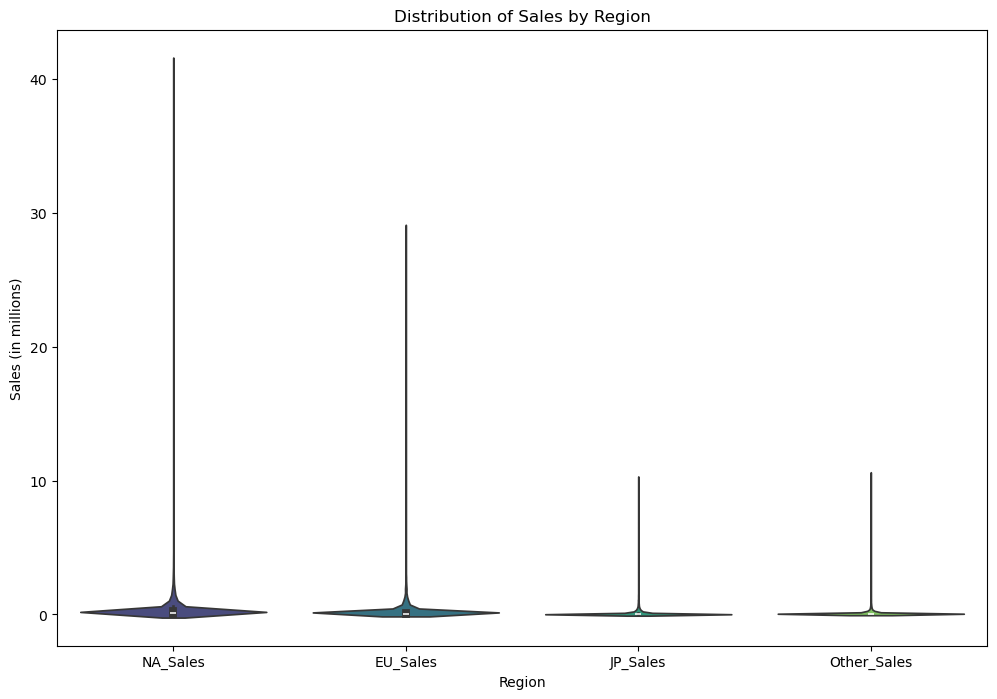

In [80]:
sales_data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].melt(var_name='Region', value_name='Sales')

# violin plot for sales distribution by region
plt.figure(figsize=(12, 8))
sns.violinplot(x='Region', y='Sales', data=sales_data, palette='viridis')
plt.title('Distribution of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.show()


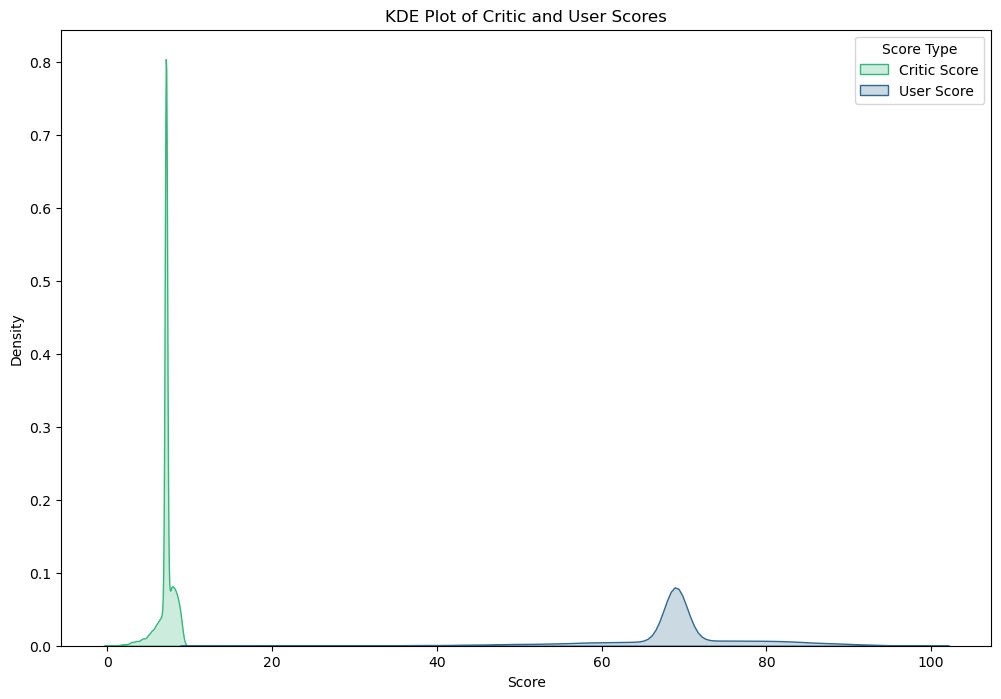

In [86]:
# plot a KDE plot for score distributions
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df[['Critic_Score', 'User_Score']], fill=True, palette='viridis')
plt.title('KDE Plot of Critic and User Scores')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend(title='Score Type', labels=['Critic Score', 'User Score'])
plt.show()